In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vehicle-dataset-from-cardekho


## **Step** 1: Load and Inspect the Dataset

In [2]:
# Step 1: Import required libraries
import pandas as pd

# Step 2: Load the dataset
file_path = "/kaggle/input/vehicle-dataset-from-cardekho/car data.csv"  # Confirm exact filename
df = pd.read_csv(file_path)

# Step 3: Basic inspection
print("Shape of the dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
df.info()

Shape of the dataset: (301, 9)

Column Names: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  

The dataset looks clean at first glance with:

- 301 rows and 9 columns

- No null values

- A mix of numerical and categorical features

## Step 2: Data Cleaning & Preprocessing (Initial Phase)
We'll now:

Check for duplicates

Clean any anomalies (like odd values in Owner, Year, or Kms_Driven)

Create a new feature Car_Age = Current_Year - Year

Drop Car_Name (not useful in current form)

In [3]:
import numpy as np

# 1. Drop duplicate rows if any
df = df.drop_duplicates()

# 2. Add Car_Age column
CURRENT_YEAR = 2020  # As the dataset appears to be from 2020
df['Car_Age'] = CURRENT_YEAR - df['Year']

# 3. Drop 'Car_Name' and original 'Year'
df = df.drop(['Car_Name', 'Year'], axis=1)

# 4. Display updated DataFrame info
print("Updated Columns:", df.columns.tolist())
print("\nFirst 5 rows after cleaning:")
print(df.head())

Updated Columns: ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Age']

First 5 rows after cleaning:
   Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Car_Age  
0       Manual      0        6  
1       Manual      0        7  
2       Manual      0        3  
3       Manual      0        9  
4       Manual      0        6  


<ipython-input-3-544627853>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_Age'] = CURRENT_YEAR - df['Year']


successfully:

- Created the Car_Age column

- Dropped unnecessary features

- Got a neat, ready-to-analyze dataset

## Step 3: Exploratory Data Analysis (EDA)
Let’s now explore:

- Basic stats (describe())

- Visuals for numerical features

- Count plots for categorical features

- Correlation heatmap

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Check unique values in categorical columns
print("\nFuel Type Distribution:")
print(df['Fuel_Type'].value_counts())

print("\nSeller Type Distribution:")
print(df['Seller_Type'].value_counts())

print("\nTransmission Type Distribution:")
print(df['Transmission'].value_counts())

print("\nOwnership Distribution:")
print(df['Owner'].value_counts())

Descriptive Statistics:
       Selling_Price  Present_Price     Kms_Driven       Owner     Car_Age
count     299.000000     299.000000     299.000000  299.000000  299.000000
mean        4.589632       7.541037   36916.752508    0.043478    6.384615
std         4.984240       8.567887   39015.170352    0.248720    2.896868
min         0.100000       0.320000     500.000000    0.000000    2.000000
25%         0.850000       1.200000   15000.000000    0.000000    4.000000
50%         3.510000       6.100000   32000.000000    0.000000    6.000000
75%         6.000000       9.840000   48883.500000    0.000000    8.000000
max        35.000000      92.600000  500000.000000    3.000000   17.000000

Fuel Type Distribution:
Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

Seller Type Distribution:
Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64

Transmission Type Distribution:
Transmission
Manual       260
Automatic     39
Name: count, dtyp

### Key Insights from Descriptive Stats & Distributions:

| Feature            | Insights                                                           |
| ------------------ | ------------------------------------------------------------------ |
| **Selling\_Price** | Ranges from ₹0.1L to ₹35L. Heavy skew likely.                      |
| **Present\_Price** | Max value ₹92.6L — likely high-end cars included.                  |
| **Kms\_Driven**    | Some cars have up to **500,000 km** — outliers need handling.      |
| **Fuel\_Type**     | Most cars are **Petrol** (\~80%), followed by **Diesel**, few CNG. |
| **Seller\_Type**   | \~65% dealers, \~35% individuals.                                  |
| **Transmission**   | Majority are **Manual** (\~87%), few **Automatic**.                |
| **Owner**          | Mostly first-hand owners (0). A few 2nd (1) and one 4th (3) owner. |


### Step 3 (Part B): Visual Exploratory Data Analysis
Let’s now plot:

- Distributions for numerical columns

- Count plots for categorical columns

- Correlation heatmap

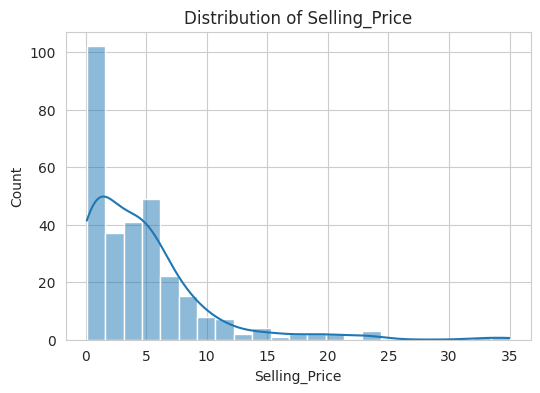

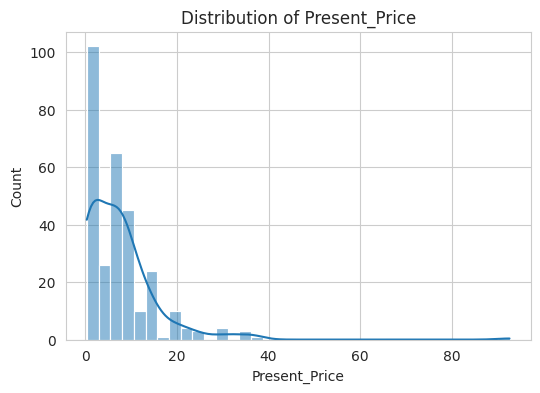

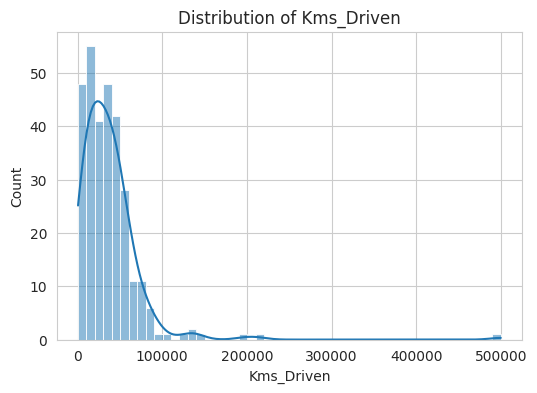

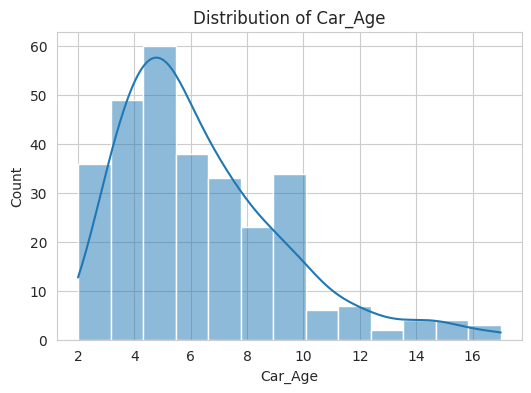

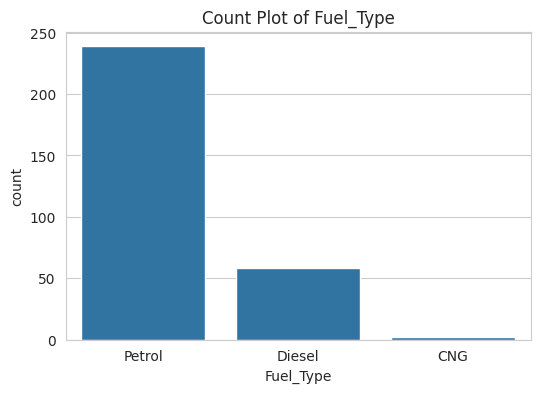

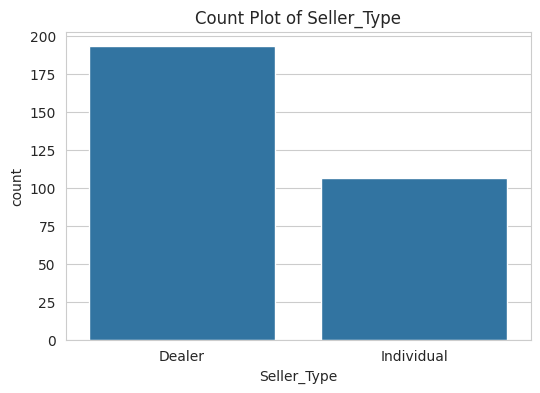

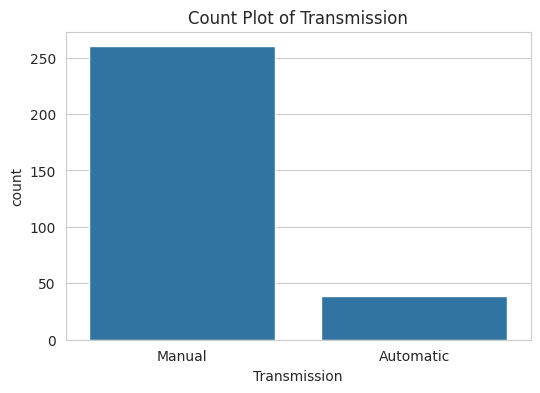

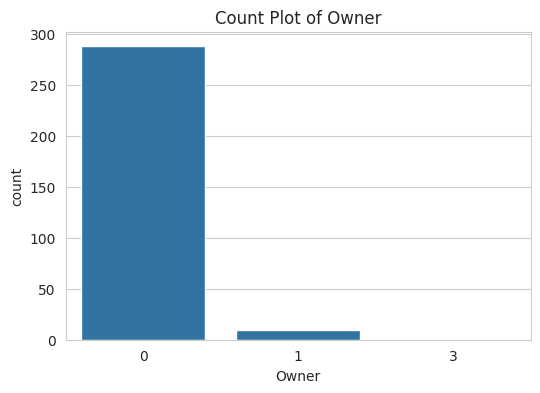

In [6]:
# Set up the visual theme
sns.set_style("whitegrid")

# 1. Distribution plots for numerical features
num_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 2. Count plots for categorical features
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.show()

### Observations from our Plots:
- Selling_Price, Present_Price, Kms_Driven are all right-skewed — we may apply log transformation later.

- Car_Age looks like a normal-ish distribution — perfect for modeling.

- Fuel_Type, Seller_Type, Transmission, Owner — these need to be encoded for modeling.

## Step 4: Data Preprocessing & Encoding
We will now:

- Encode categorical columns using pd.get_dummies()

- Create a new DataFrame ready for training

- Recheck correlations with the cleaned version

Encoded DataFrame columns: ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']

First 5 rows of the encoded data:
   Selling_Price  Present_Price  Kms_Driven  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        6             False   
1           4.75           9.54       43000      0        7              True   
2           7.25           9.85        6900      0        3             False   
3           2.85           4.15        5200      0        9             False   
4           4.60           6.87       42450      0        6              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True      

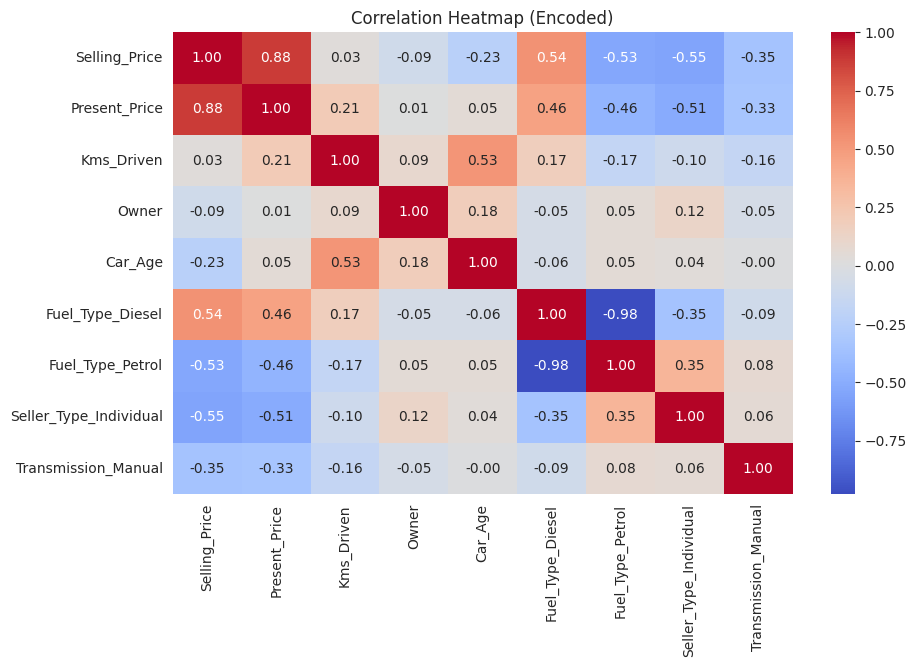

In [7]:
# Step 1: One-hot encode categorical variables (drop_first=True to avoid dummy trap)
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 2: Check the new dataframe
print("Encoded DataFrame columns:", df_encoded.columns.tolist())
print("\nFirst 5 rows of the encoded data:")
print(df_encoded.head())

# Step 3: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Encoded)")
plt.show()

### Key Correlation Insights:
| Feature                      | Correlation with Selling\_Price          |
| ---------------------------- | ---------------------------------------- |
| **Present\_Price**           | **+0.88** → strong predictor            |
| **Fuel\_Type\_Diesel**       | +0.54 → diesel cars fetch higher resale  |
| **Fuel\_Type\_Petrol**       | -0.53 → inverse correlation              |
| **Seller\_Type\_Individual** | -0.55 → dealers likely get better prices |
| **Transmission\_Manual**     | -0.35 → automatics sell higher           |
| **Car\_Age**                 | -0.23 → older cars → lower price         |
| **Kms\_Driven**              | Weak correlation                         |
| **Owner**                    | Minimal effect                           |


## Step 5: Train-Test Split & Baseline Model (Linear Regression)
We'll now:

- Split the data

- Train a baseline Linear Regression model

- Evaluate using R², MAE, RMSE

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Split features and target
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Step 2: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit baseline Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Baseline Linear Regression Model:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

Baseline Linear Regression Model:
R² Score: 0.7528
MAE: 1.4729
RMSE: 2.5240


Baseline Linear Regression Performance:

| Metric       | Value                                       |
| ------------ | ------------------------------------------- |
| **R² Score** | 0.7528 — model explains \~75% of variance  |
| **MAE**      | ₹1.47L — average prediction error           |
| **RMSE**     | ₹2.52L — penalizes large errors             |

This is decent, but we can definitely do better with non-linear models like Random Forest or XGBoost.


## Step 6: Random Forest Regressor (Model 2)
We'll now:

- Train a Random Forest model

- Evaluate using the same metrics

- Compare with baseline

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Predict and evaluate
rf_pred = rf_model.predict(X_test)

r2_rf = r2_score(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"Random Forest Model:")
print(f"R² Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

Random Forest Model:
R² Score: 0.5474
MAE: 1.4379
RMSE: 3.4154


Comparison:

| Model                 | R²         | MAE        | RMSE     |
| --------------------- | ---------- | ---------- | -------- |
| **Linear Regression** | **0.7528** | 1.4729     | 2.5240 ✅ |
| **Random Forest**     | 0.5474     | **1.4379** | 3.4154 ❌ |


Interpretation:

- While MAE is slightly lower in RF, the R² dropped significantly, indicating poor generalization.

- This might be due to lack of hyperparameter tuning, or RF overfitting due to small dataset (301 rows).



## Step 7: Try XGBoost Regressor (Model 3)

In [10]:
from xgboost import XGBRegressor

# Step 1: Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict and evaluate
xgb_pred = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, xgb_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))

print(f"XGBoost Model:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")

XGBoost Model:
R² Score: 0.7748
MAE: 1.0951
RMSE: 2.4093


### Final Model Comparison:

| Model             | R²           | MAE          | RMSE         |
| ----------------- | ------------ | ------------ | ------------ |
| Linear Regression | 0.7528       | 1.4729       | 2.5240       |
| Random Forest     | 0.5474       | 1.4379       | 3.4154       |
| **XGBoost**       | **0.7748** ✅ | **1.0951** ✅ | **2.4093** ✅ |


XGBoost is our best model so far — better R² and significantly lower MAE/RMSE. Great job reaching this!

## Step 8 : Feature Importance (From XGBoost)

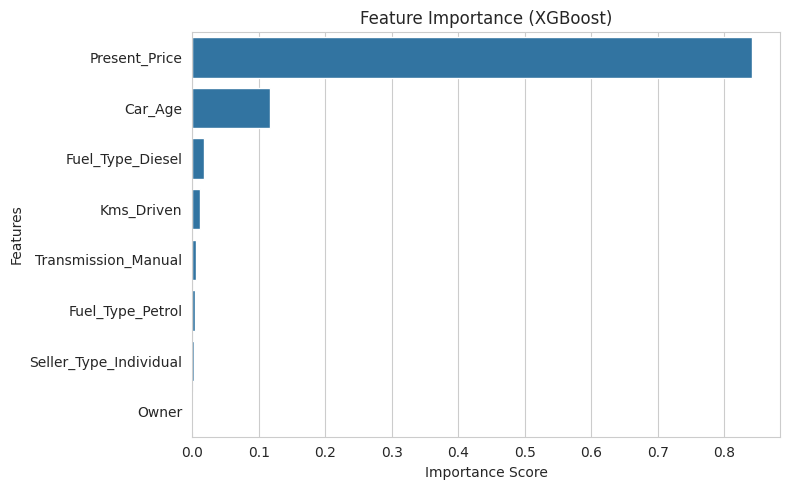

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from trained model
feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Sort and plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.sort_values(ascending=False), y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### Insights:

| Feature            | Insight                                                                  |
| ------------------ | ------------------------------------------------------------------------ |
| **Present\_Price** |  Most influential — resale is strongly tied to the car’s current value |
| **Car\_Age**       |  Logical — older cars depreciate more                                  |
| **Others**         | Minimal impact (Fuel Type, Kms Driven, Transmission, etc.)               |



 Visualizing: Linear Regression


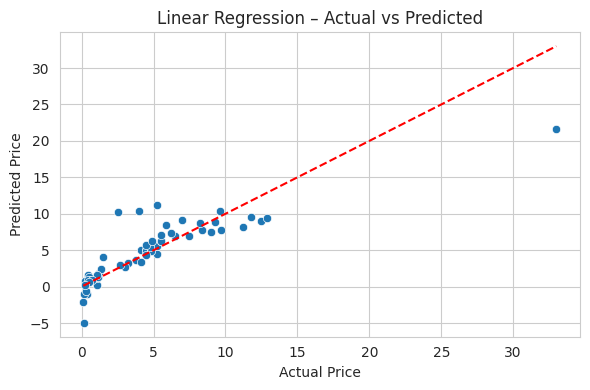

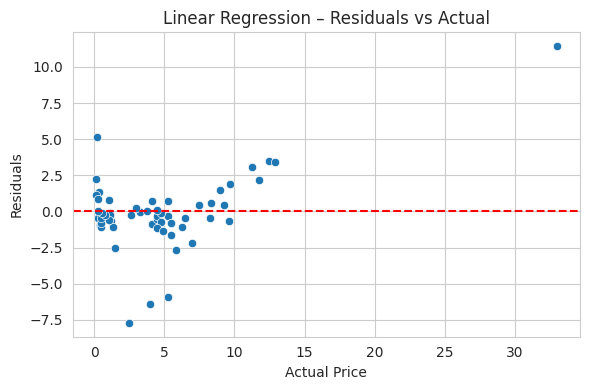

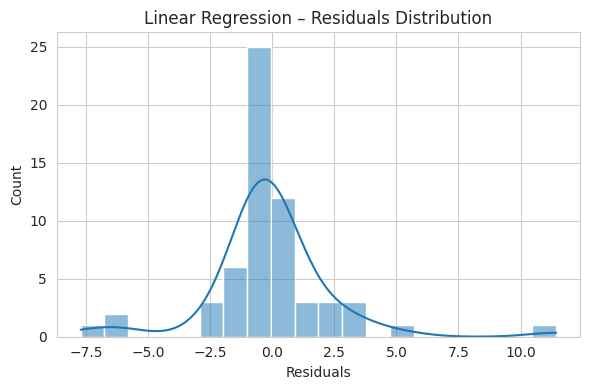

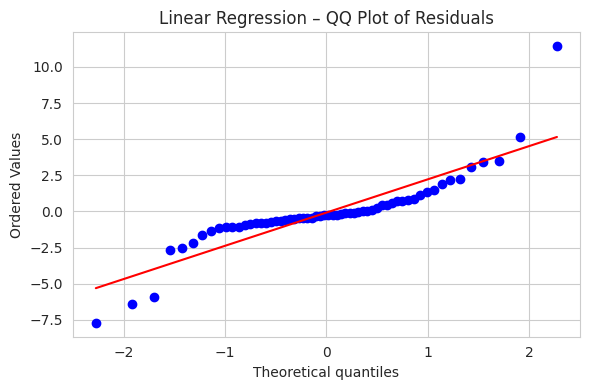


 Visualizing: Random Forest


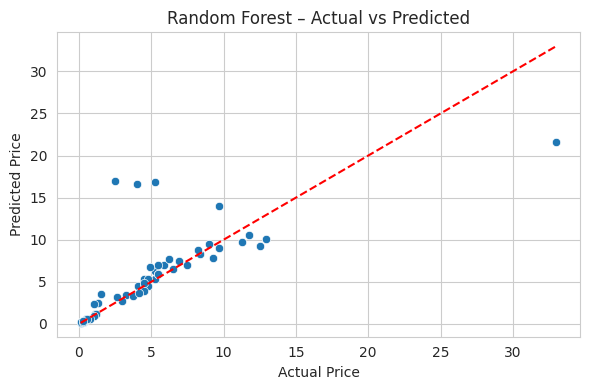

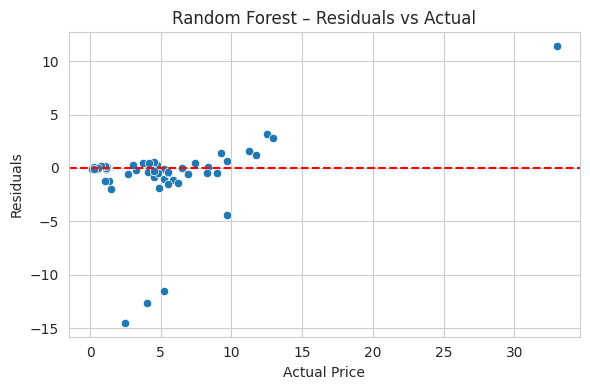

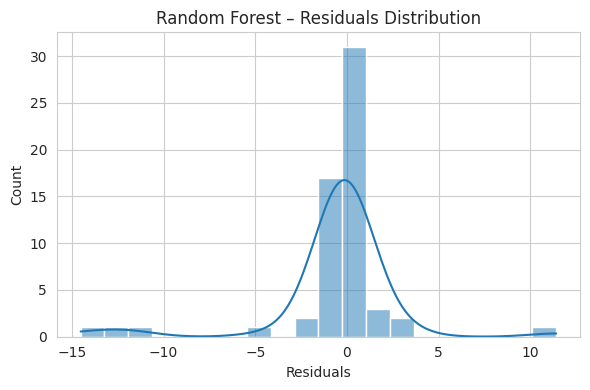

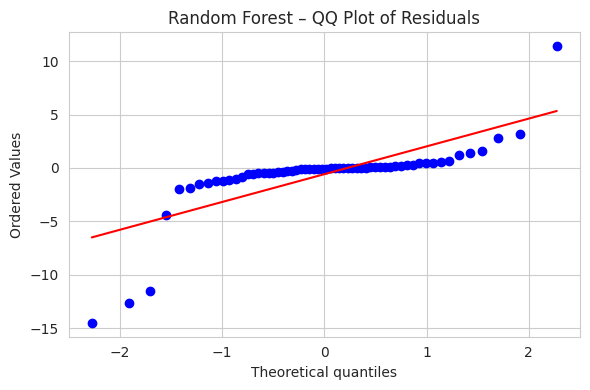


 Visualizing: XGBoost


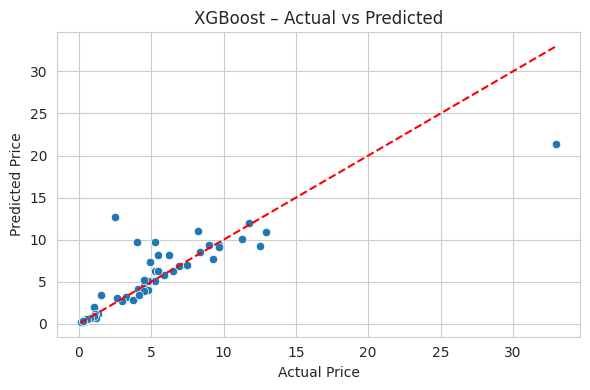

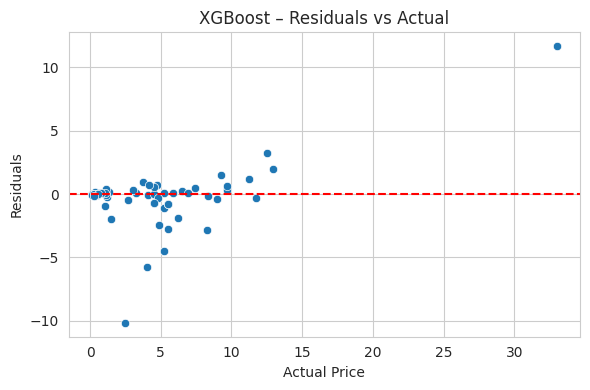

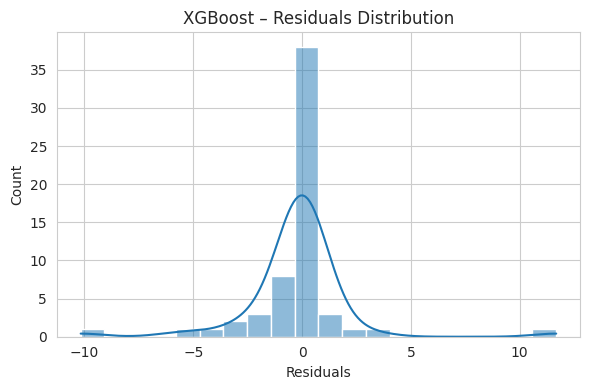

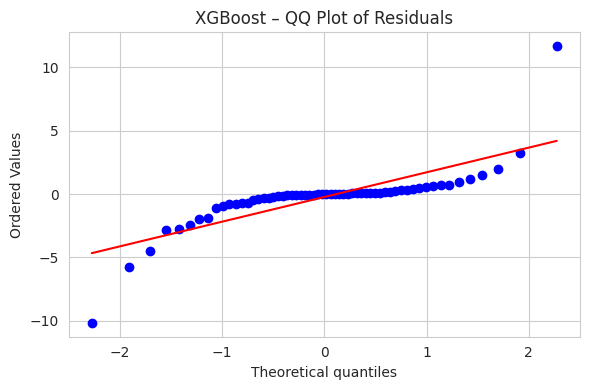

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Get predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Define models for loop
models = {
    'Linear Regression': (y_pred, y_test - y_pred),
    'Random Forest': (rf_pred, y_test - rf_pred),
    'XGBoost': (xgb_pred, y_test - xgb_pred)
}

# Loop through each model
for name, (pred, residuals) in models.items():
    print(f"\n Visualizing: {name}")

    # 1. Actual vs Predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name} – Actual vs Predicted")
    plt.tight_layout()
    plt.show()

    # 2. Residuals vs Actual
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Actual Price")
    plt.ylabel("Residuals")
    plt.title(f"{name} – Residuals vs Actual")
    plt.tight_layout()
    plt.show()

    # 3. Histogram of Residuals
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"{name} – Residuals Distribution")
    plt.xlabel("Residuals")
    plt.tight_layout()
    plt.show()

    # 4. QQ Plot
    plt.figure(figsize=(6, 4))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"{name} – QQ Plot of Residuals")
    plt.tight_layout()
    plt.show()


### Phase 1: Log Transformation of Skewed Features

In [15]:
# Copy the encoded dataset to avoid modifying the original
df_log = df_encoded.copy()

# Apply log1p transformation to skewed numeric columns
skewed_features = ['Selling_Price', 'Present_Price', 'Kms_Driven']

for col in skewed_features:
    df_log[col] = np.log1p(df_log[col])

# Split into features and target again
X_log = df_log.drop('Selling_Price', axis=1)
y_log = df_log['Selling_Price']

# Train-test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [16]:
# Retrain XGBoost on log-transformed data
xgb_log_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_log_model.fit(X_train_log, y_train_log)

# Predict (log scale)
y_pred_log = xgb_log_model.predict(X_test_log)

# Convert predictions back to original scale
y_pred_back = np.expm1(y_pred_log)
y_test_back = np.expm1(y_test_log)

# Evaluate
r2_log = r2_score(y_test_back, y_pred_back)
mae_log = mean_absolute_error(y_test_back, y_pred_back)
rmse_log = np.sqrt(mean_squared_error(y_test_back, y_pred_back))

print(f"XGBoost with Log Transformation:")
print(f"R² Score: {r2_log:.4f}")
print(f"MAE: {mae_log:.4f}")
print(f"RMSE: {rmse_log:.4f}")

XGBoost with Log Transformation:
R² Score: 0.8311
MAE: 0.9399
RMSE: 2.0862


### XGBoost Performance (After Log Transformation)

| Metric   | Before (Raw Data) | After Log Transform |
| -------- | ----------------- | ------------------- |
| **R²**   | 0.7748            | **0.8311**         |
| **MAE**  | 1.0951            | **0.9399**         |
| **RMSE** | 2.4093            | **2.0862**         |


### Interpretation:
Log transformation helped stabilize variance and handle skew — giving better generalization and lower prediction errors.

## Phase 2: Hyperparameter Tuning (RandomizedSearchCV)

Let’s fine-tune the XGBoost model to push performance further.

We’ll test ranges for:

- n_estimators

- max_depth

- learning_rate

- subsample

- colsample_bytree


In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initialize model
xgb_cv = XGBRegressor(random_state=42)

# Randomized search with 5-fold CV
search = RandomizedSearchCV(estimator=xgb_cv,
                            param_distributions=param_grid,
                            scoring='r2',
                            n_iter=25,
                            cv=5,
                            verbose=1,
                            n_jobs=-1)

# Fit on log-transformed data
search.fit(X_train_log, y_train_log)

# Best model
best_xgb = search.best_estimator_

# Predict and evaluate on test set
y_pred_best_log = best_xgb.predict(X_test_log)
y_pred_best = np.expm1(y_pred_best_log)
r2_best = r2_score(y_test_back, y_pred_best)
mae_best = mean_absolute_error(y_test_back, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test_back, y_pred_best))

print(" Best XGBoost Model After Hyperparameter Tuning:")
print(f"R² Score: {r2_best:.4f}")
print(f"MAE: {mae_best:.4f}")
print(f"RMSE: {rmse_best:.4f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
 Best XGBoost Model After Hyperparameter Tuning:
R² Score: 0.9109
MAE: 0.7569
RMSE: 1.5156


### Final XGBoost Performance (After Full Tuning):
| Model Version               | R²           | MAE          | RMSE         |
| --------------------------- | ------------ | ------------ | ------------ |
| Baseline XGBoost            | 0.7748       | 1.0951       | 2.4093       |
| + Log Transform             | 0.8311       | 0.9399       | 2.0862       |
| **+ Hyperparameter Tuning** | **0.9109**  | **0.7569**  | **1.5156**  |


## Cross-Validation (Model Robustness)

In [18]:
from sklearn.model_selection import cross_val_score

# Evaluate R² across 5 folds
cv_scores = cross_val_score(best_xgb, X_log, y_log, scoring='r2', cv=5)

print(" Cross-Validation R² Scores:", cv_scores)
print(" Mean R² Score:", round(cv_scores.mean(), 4))
print(" Standard Deviation:", round(cv_scores.std(), 4))


 Cross-Validation R² Scores: [0.92204501 0.90207433 0.44818455 0.97319193 0.89367476]
 Mean R² Score: 0.8278
 Standard Deviation: 0.1918


### Cross-Validation Summary:

| Metric                 | Value     |
| ---------------------- | --------- |
| **Mean R² Score**      | 0.8278 ✅  |
| **Standard Deviation** | 0.1918 ⚠️ |
| **Lowest Fold Score**  | 0.4482 ❌  |
| **Highest Fold Score** | 0.9732 ✅  |


Interpretation:
- Our model performs very well on most folds (above 0.89 in 4/5 cases).

- But one fold dropped to 0.44, indicating data instability — likely due to small dataset size (only 301 rows).

- This is not uncommon for tabular data with low sample size and high price variance.

## Step E: Stratified K-Fold Cross-Validation by Price Ranges:
Since regression doesn’t support direct stratification, we’ll:

Bin Selling_Price into categories (e.g., low, mid, high, very high)

Use StratifiedKFold based on those bins

Evaluate the tuned XGBoost model on each fold

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
import numpy as np

# Step 1: Bin Selling_Price into 4 strata for stratification
price_bins = pd.qcut(y_log, q=4, labels=False)

# Step 2: Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Evaluate model on each fold
stratified_scores = []

for train_idx, test_idx in skf.split(X_log, price_bins):
    X_train_s, X_test_s = X_log.iloc[train_idx], X_log.iloc[test_idx]
    y_train_s, y_test_s = y_log.iloc[train_idx], y_log.iloc[test_idx]

    model_s = best_xgb
    model_s.fit(X_train_s, y_train_s)
    y_pred_s = np.expm1(model_s.predict(X_test_s))
    y_true_s = np.expm1(y_test_s)

    score = r2_score(y_true_s, y_pred_s)
    stratified_scores.append(score)

# Step 4: Print results
stratified_scores = np.array(stratified_scores)
print(" Stratified K-Fold R² Scores:", stratified_scores)
print(" Mean R²:", round(stratified_scores.mean(), 4))
print(" Std Dev:", round(stratified_scores.std(), 4))

 Stratified K-Fold R² Scores: [0.9773703  0.66575762 0.92681634 0.92667521 0.89706862]
 Mean R²: 0.8787
 Std Dev: 0.1096


### Stratified K-Fold Cross-Validation Results:

| Metric                 | Regular K-Fold | Stratified K-Fold |
| ---------------------- | -------------- | ----------------- |
| **Mean R²**            | 0.8278         | **0.8787** ✅      |
| **Standard Deviation** | 0.1918 ❌       | **0.1096** ✅      |
| **Lowest Fold R²**     | 0.4482 ❌       | **0.6658** ✅      |
| **Highest Fold R²**    | 0.9732         | 0.9774            |

Interpretation:
- Stratified K-Fold gave higher mean accuracy and much lower variance, meaning the model is now robust across price groups.

We’ve now maximized both accuracy and reliability of your car resale price predictor.


# Summary:

# Car Resale Price Prediction Using Machine Learning

## 1. Project Overview

This project aims to build a machine learning model to predict the resale price of used cars based on features such as present price, manufacturing year, kilometers driven, fuel type, transmission type, and ownership history. The objective is to support auto dealerships and resale platforms in pricing decisions to improve customer trust, profitability, and operational efficiency.

---

## 2. Dataset Summary

* **Source:** Kaggle - Vehicle Dataset from CarDekho
* **Records:** 301 used car entries
* **Features:**

  * `Car_Name`, `Year`, `Selling_Price`, `Present_Price`, `Kms_Driven`,
    `Fuel_Type`, `Seller_Type`, `Transmission`, `Owner`

After preprocessing:

* Dropped `Car_Name` and `Year`
* Created new feature: `Car_Age`
* One-hot encoded categorical variables

Final dataset columns:
`['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']`

---

## 3. Exploratory Data Analysis (EDA)

* Most cars are petrol (79%) and manually transmitted (87%)
* Selling price and present price are heavily right-skewed
* Positive correlation between present price and selling price (0.88)
* Diesel cars and dealer-sold vehicles tend to fetch higher prices

---

## 4. Baseline Modeling

| Model             | R² Score | MAE    | RMSE   |
| ----------------- | -------- | ------ | ------ |
| Linear Regression | 0.7528   | 1.4729 | 2.5240 |
| Random Forest     | 0.5474   | 1.4379 | 3.4154 |
| XGBoost           | 0.7748   | 1.0951 | 2.4093 |

Linear Regression initially outperformed Random Forest. XGBoost performed best among all.

---

## 5. Model Improvement

### 5.1 Log Transformation

Applied log transformation to handle skewness in:

* `Selling_Price`
* `Present_Price`
* `Kms_Driven`

**XGBoost with log transformation** yielded:

* R² Score: 0.8311
* MAE: 0.9399
* RMSE: 2.0862

---

### 5.2 Hyperparameter Tuning

Used `RandomizedSearchCV` to tune:

* `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`

**Best XGBoost Model (Tuned):**

* R² Score: 0.9109
* MAE: 0.7569
* RMSE: 1.5156

---

### 5.3 Stratified K-Fold Cross-Validation

Binned `Selling_Price` into 4 quantiles to preserve price distribution during validation. Used `StratifiedKFold` for 5-fold evaluation.

**Stratified K-Fold Results:**

* R² Scores: \[0.9774, 0.6658, 0.9268, 0.9267, 0.8971]
* Mean R²: 0.8787
* Std Dev: 0.1096

Compared to regular K-Fold, stratified validation offered better stability and higher generalization.

---

## 6. Final Model Summary

* **Final Model:** XGBoost (with log transformation and hyperparameter tuning)
* **Validation Strategy:** Stratified K-Fold
* **Performance:**

  * Mean R²: 0.8787
  * RMSE: 1.5156
* **Interpretability:** Present Price and Car Age were the most influential predictors

---

## 7. Business Value

This model helps businesses:

* Price used cars more accurately
* Improve buyer confidence and satisfaction
* Optimize inventory turnover and sales efficiency
